 **Forecasting car prices in Belarus**

The object of this project is to predict/forecast the car prices in Belarus, by analyzing car features like brand, engine, fuel type, segment, transmisson, mileage, drive unit, color.

The feature Description:

Brand: The car manufacturer.

Engine: Engine specifications.

Fuel Type: Whether the car runs on gasoline, diesel, electric, or hybrid.

Segment: Car segment.

Transmission: Manual or automatic transmission.

Mileage: Total distance the car has traveled.

Drive Unit: Front-wheel drive, rear-wheel drive, or all-wheel drive.
Color: Exterior color of the car.

The dataset consist of 57,000 rows and 12 columns

#### Importing the libraries.

In [192]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
#importing the Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
#Loading the data set
path= '/content/cars.csv'
df= pd.read_csv(path)
df.head()




,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


# Data PreProccessing Part

In [149]:
df.shape

(56244, 12)

In [150]:
#checking the datatypes in the columns
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [151]:
#Dropping the columns that is not needed for the analysis
data= df.drop(columns=['model','segment'])

In [152]:
# Finding out the unique values in the columns
data.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [153]:
# Finding out unique car make
data['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since it could be observed there are many car make, its difficult for analyzing, so grouping them based on car make and region where they are produced will make data more readable for further analysis.

In [154]:
# Grouping the car make based on region where they are made
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'

data['make_segment'] = data['make'].apply(car_make)

In [155]:
#Now lets perform some statistics on this dataset
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [156]:
data.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


Now lets perform some EDA(Exploratory Data Analysis) to understand the relationship between target and independent variables. I will also analyze the relationship between idependent variables, giving me more data insights like which variable have more impact on target variable.

Categorical Variable Distribution

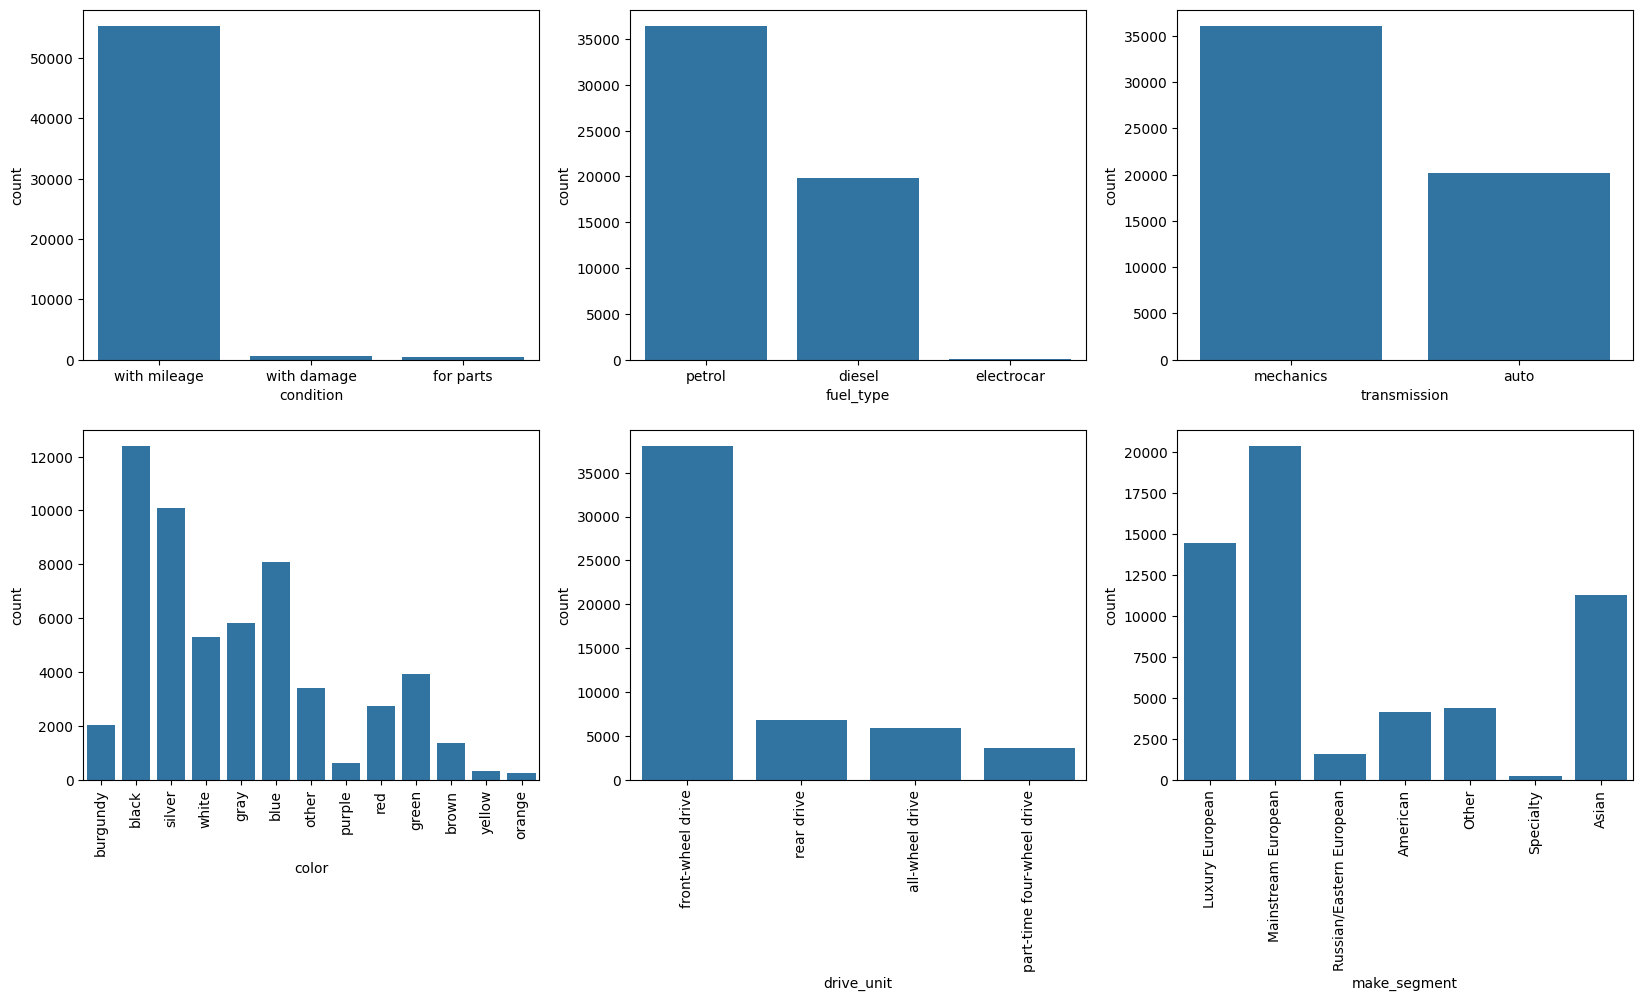

In [157]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=data, ax=ax[0,0])
sns.countplot(x='fuel_type', data=data, ax=ax[0,1])
sns.countplot(x='transmission', data=data, ax=ax[0,2])
sns.countplot(x='color', data=data, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=data, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=data, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

From the above graphs, we can get an overview regarding the data across the categorical variables in the data set. The from the above graphs it is clear that majority of the cars are being sold are in working condition, majority of them run on petrol, followed by diesel and hardly any of them runs on electricity

Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

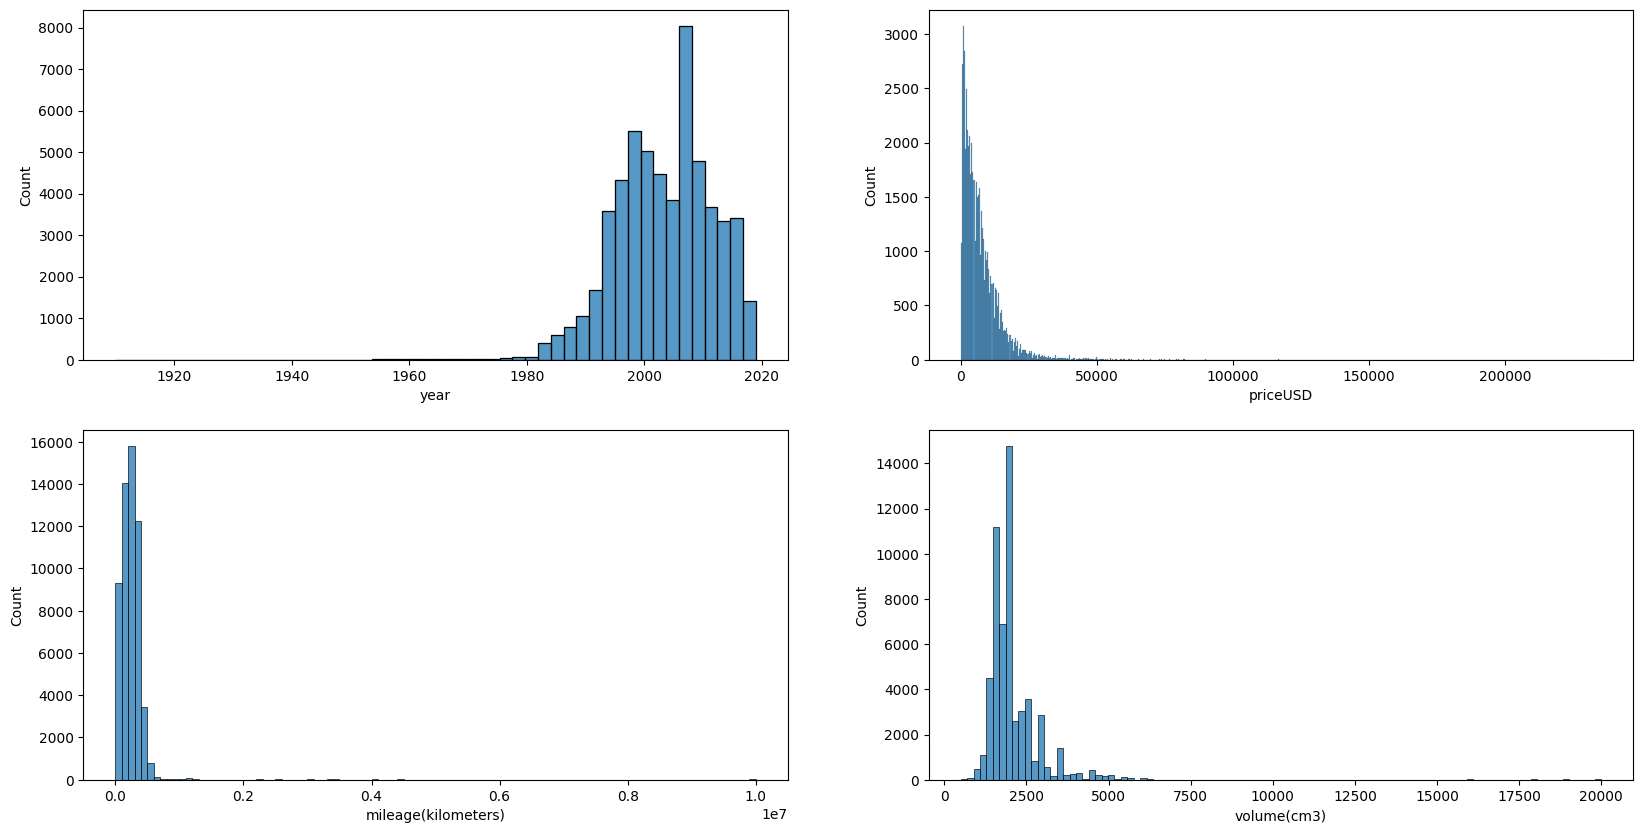

In [158]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (data['year'], ax=ax[0,0], bins = 50)
sns.histplot(data['priceUSD'], ax=ax[0,1])
sns.histplot(data['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(data['volume(cm3)'], ax=ax[1,1], bins = 100)

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.



Price vs Condition

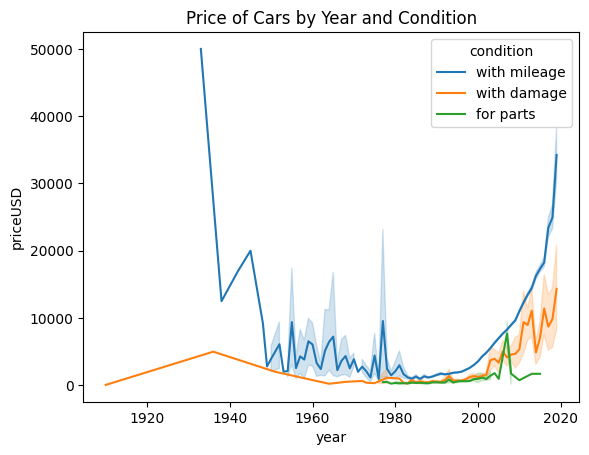

In [159]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with selling codition of the car. Cars, which are sold in working condition, are more expensive and their price increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had a similar price to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their price increased very little with time.

The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than the diesel ones. The cars running on electricity tend to have very high prices and low mileage

Price VS Transmission

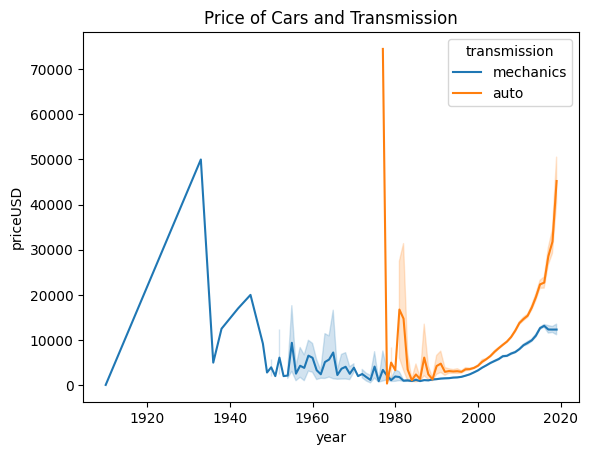

In [160]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

Price VS Brand Segment

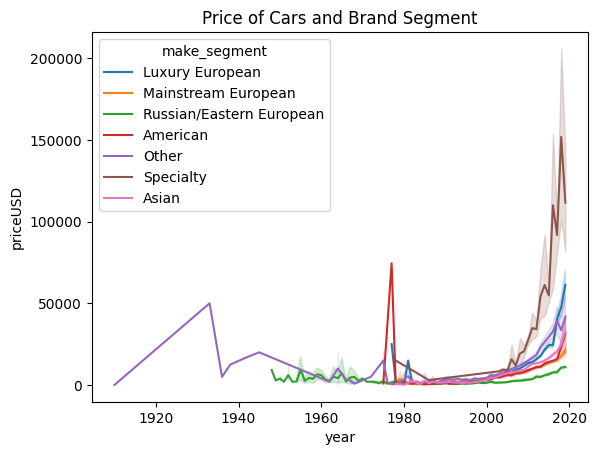

In [161]:
sns.lineplot(x = 'year', y = 'priceUSD', data = data, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

This graph shows the surge in car prices after 2005, where we can seen that the price of the specialty car segment increased significanlty followed by the luxury european car, American, Asian and Mainstream European car segment. The price of the Russian/Eastern European car segment increased at a slower pace as compared to other segments and is lowest among all the segments.

Data PreProccessing Part II

In [162]:
#Checking null values in the dataset
data.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
make_segment              0
dtype: int64

In [171]:
data.dropna(inplace=True)

In [172]:
data.drop(columns=['make'], inplace=True)

In [173]:
data.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,2,162000.0,2,1500.0,3,1,1,2
1,5350,2009,2,120000.0,2,1300.0,0,1,1,2
2,7000,2009,2,61000.0,2,1500.0,10,0,1,2
3,3300,2003,2,265000.0,0,1400.0,11,1,1,2
4,5200,2008,2,97183.0,0,1400.0,4,1,1,2


Label encoding object data type

In [174]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    print(col, data[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 4 3 0 2]
make_segment [2 3 5 0 4 6 1]


Correlation Heatmap

<Axes: >

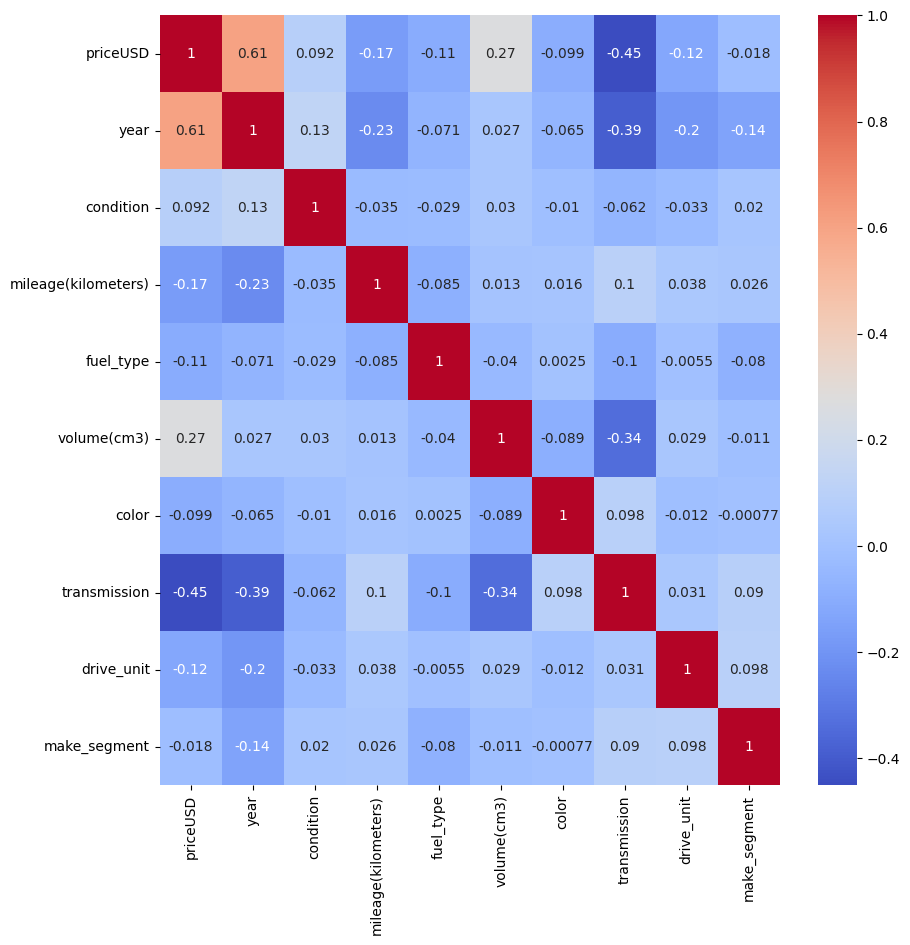

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [178]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(data))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = data[(z < 3).all(axis=1)]

Train Test Split

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

Model Building

In [180]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [181]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
dtree.score(X_train, y_train)

0.9777052107315698

Understanding Feature Importance

In [186]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtree.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
2,mileage(kilometers),0.446071
5,color,0.188986
0,year,0.093277
4,volume(cm3),0.081524
8,make_segment,0.078258
7,drive_unit,0.052433
6,transmission,0.038408
3,fuel_type,0.021042
1,condition,0.000000


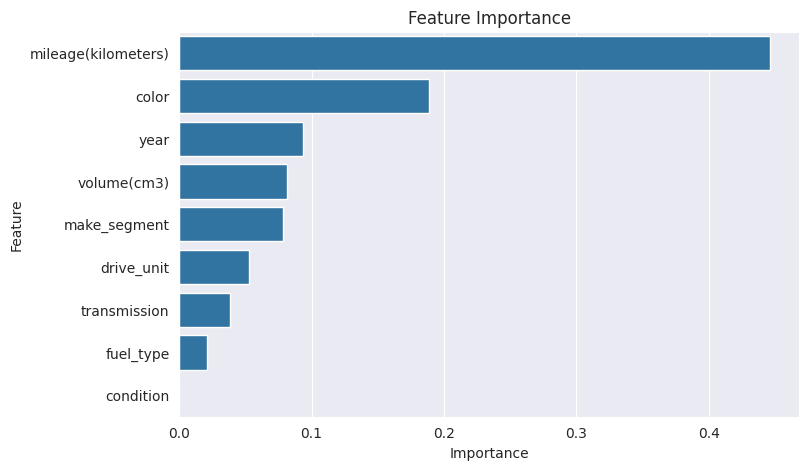

In [187]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

Inferences:

The objective of this project was to forecast car prices in Belarus by examining features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. Exploratory data analysis revealed a marked increase in car prices in Belarus post-2000. Petrol cars with automatic transmissions are priced higher than diesel cars with manual transmissions. Electric cars, however, are notably more expensive than other types. Among drive units, all-wheel-drive vehicles command the highest prices. In terms of segments, specialty cars top the list, followed by luxury European, American, and Asian car segments.

A decision tree classifier model was employed to predict car prices, achieving a 97% accuracy rate. The mileage, color are the most important features for predicting car price, followed by year and volume.